In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PyCUB import pyCUB
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
cub = pyCUB.PyCUB()
cub.load(filename='first50')

Reviewing all the 495 files
at YAL033W we have 381 homologies
at YBL095W we have 199 homologies
at YBR062C we have 284 homologies
at YBL063W we have 391 homologies
at YBL019W we have 193 homologies
at YBR117C we have 145 homologies
at YBR084W we have 299 homologies
at YBL005W we have 22 homologies
at YBL018C we have 23 homologies
at YBL034C we have 217 homologies
at YBL090W we have 51 homologies
at YBL040C we have 305 homologies
at YAL041W we have 239 homologies
at YBR105C we have 212 homologies
at YAL019W we have 285 homologies
at YBR073W we have 307 homologies
at YBL099W we have 375 homologies
at YBR160W we have 214 homologies
at YBL010C we have 21 homologies
at YBR110W we have 308 homologies
at YAL064C-A we have 39 homologies
at YBR013C we have 6 homologies
at YAL046C we have 309 homologies
at YBR012W-A we have 11 homologies
at YBL089W we have 185 homologies
at YAL068C we have 9 homologies
you had 313 same species homologies (it can't be processed!)
reviewed 26 homologies and 362spe

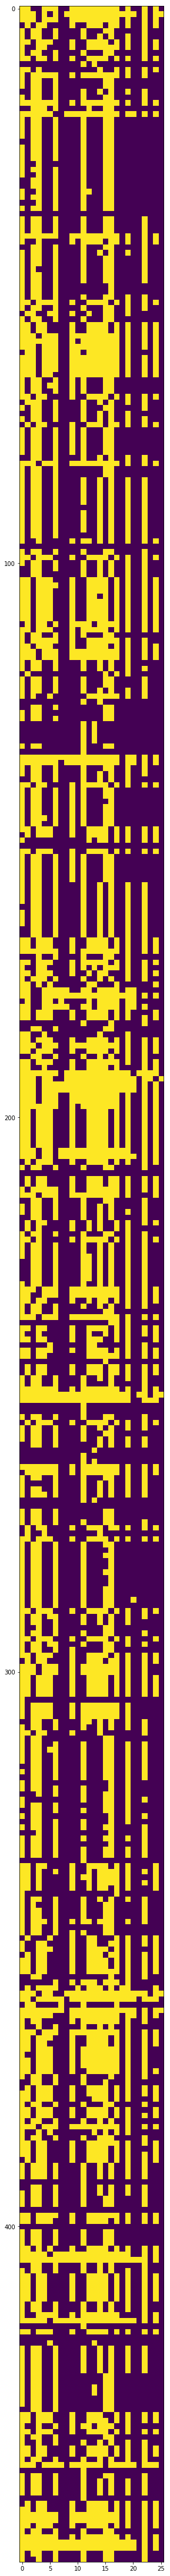

In [7]:
import numpy as np
plt.figure(figsize=(40,80))
#plt.imshow(np.matmul(cub.matrix.T ,cub.matrix))
plt.imshow(cub.full_homo_matrix)
plt.show()

## can be seen as how similar species are to each others.

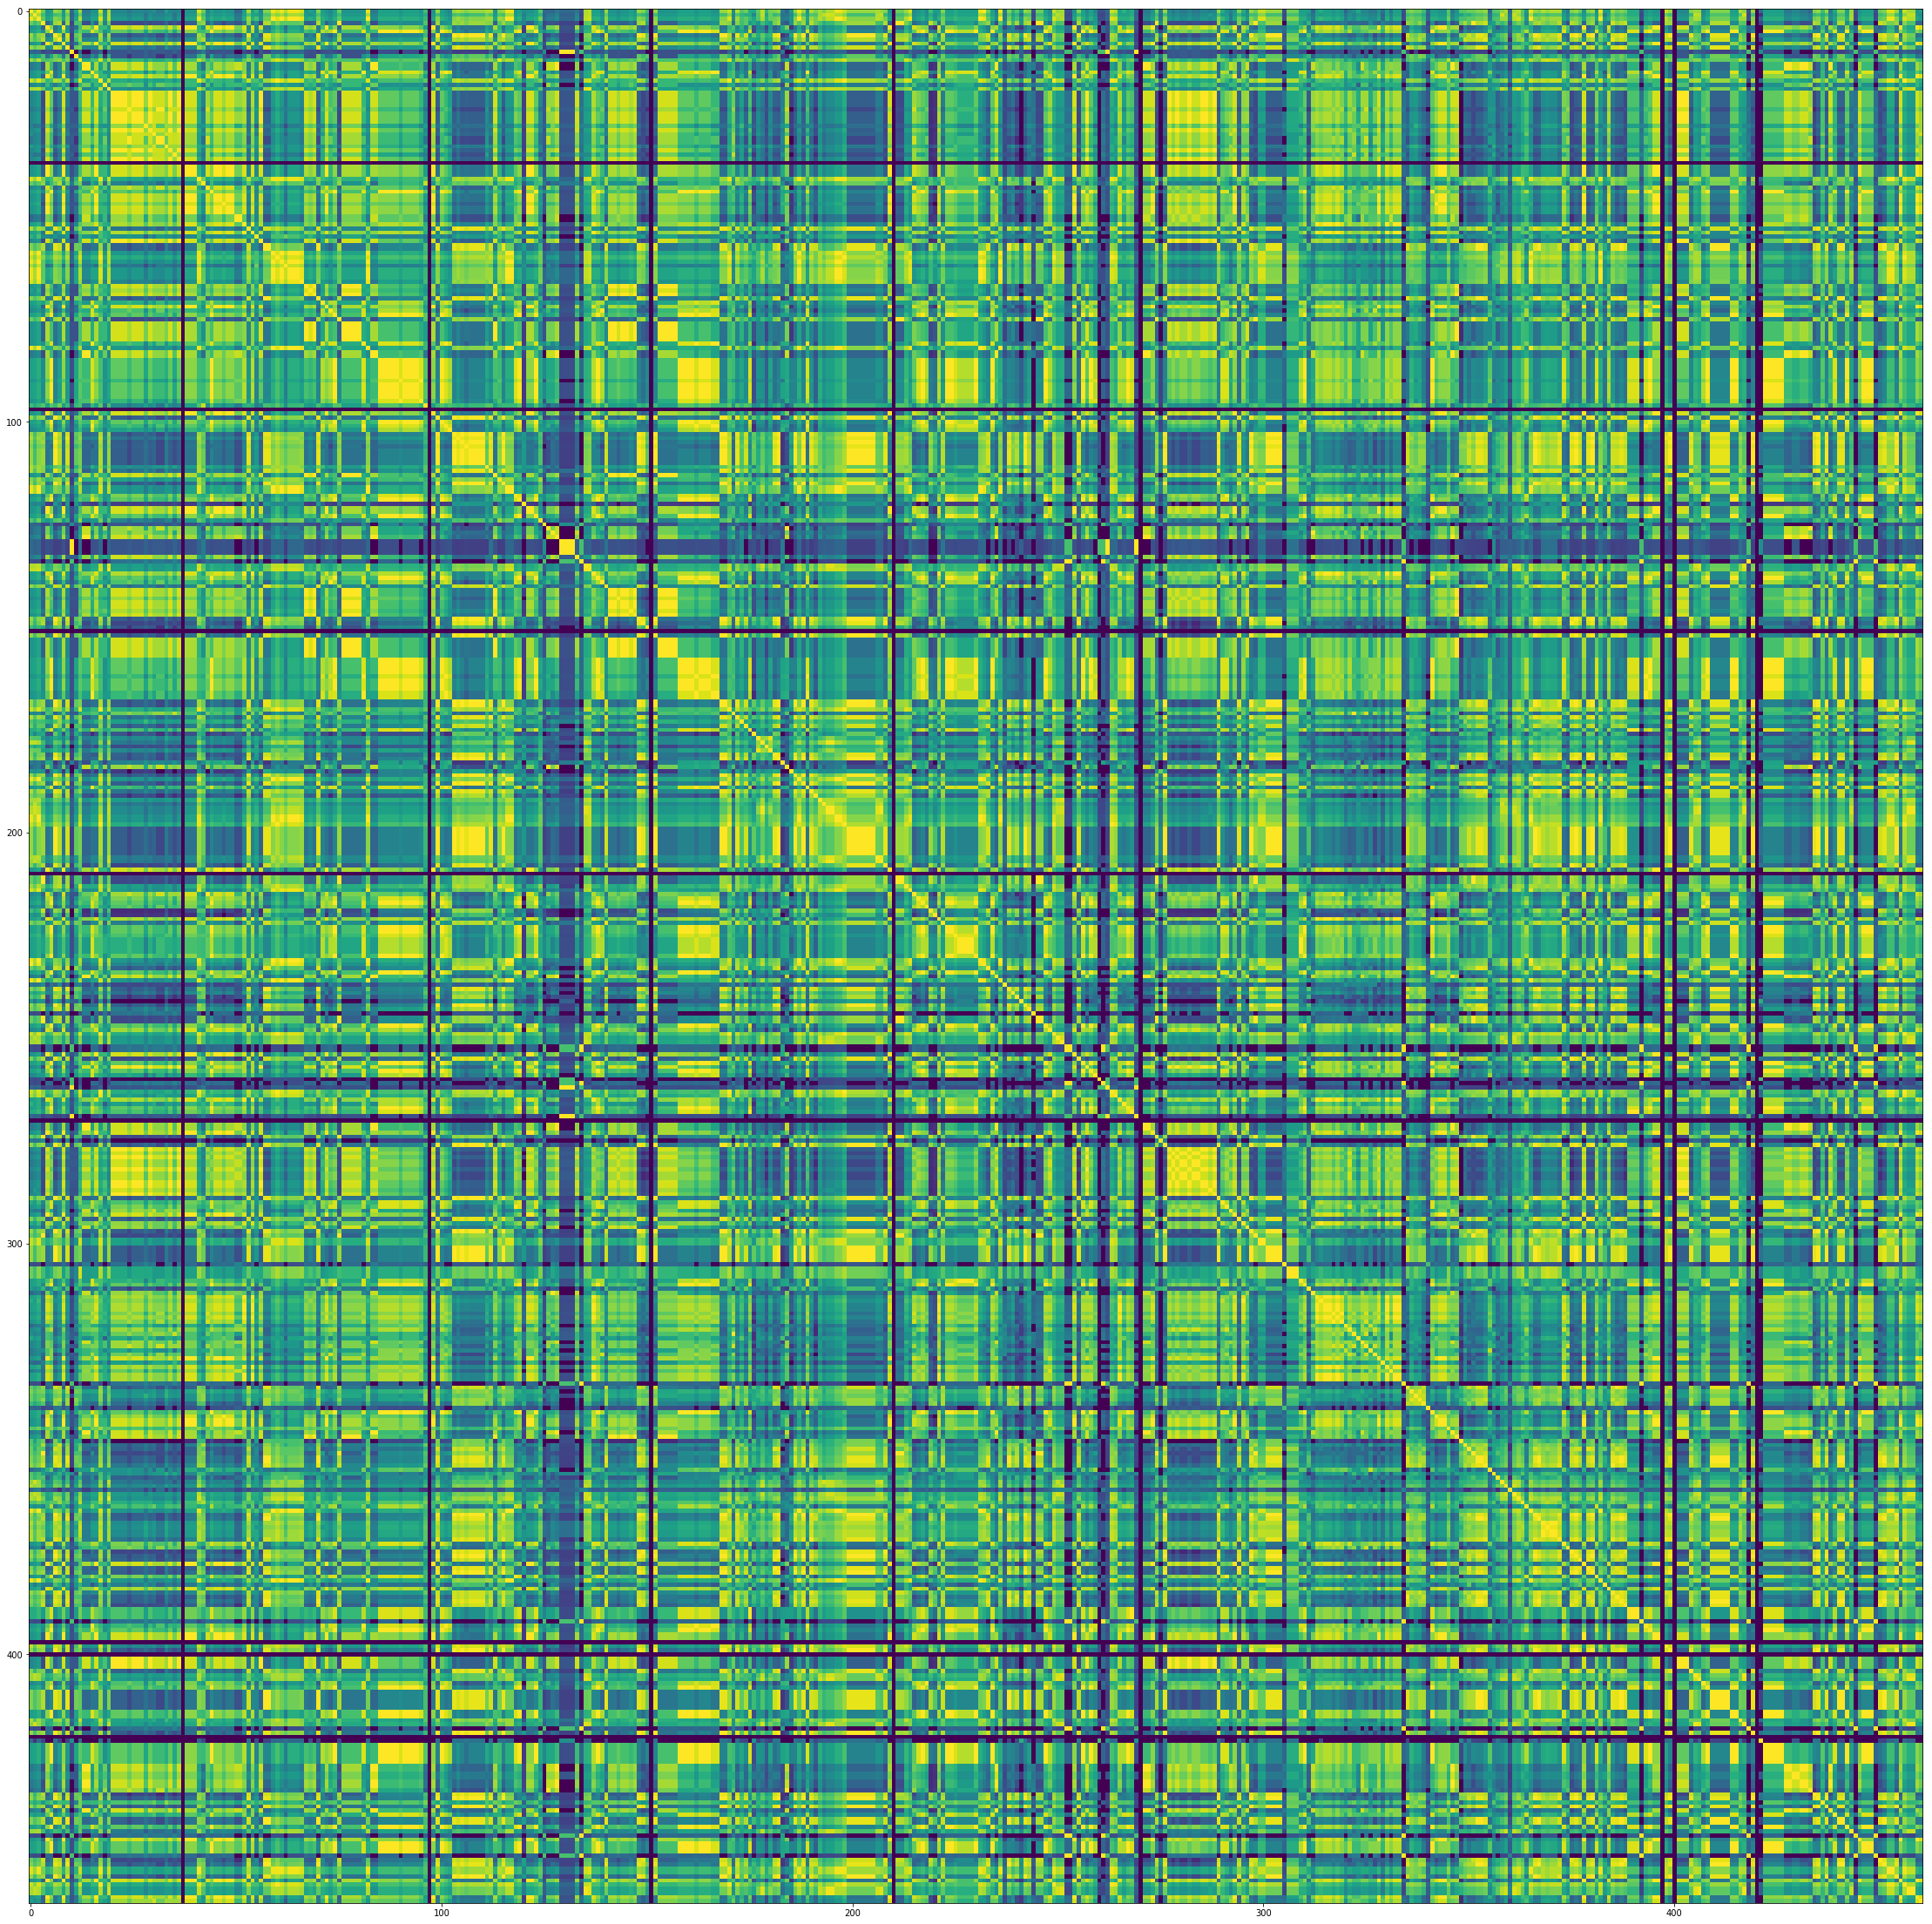

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

mat_sparse = sparse.csr_matrix(cub.full_homo_matrix)
similarities = cosine_similarity(mat_sparse)
plt.figure(figsize=(40,40))

plt.imshow(similarities)
plt.show()

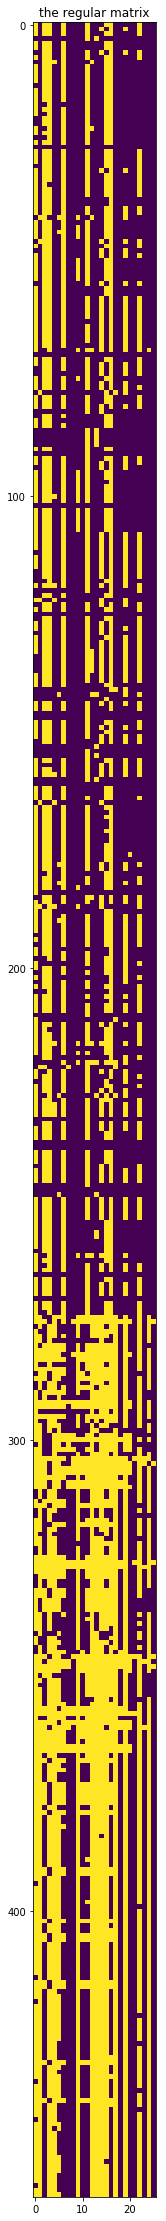

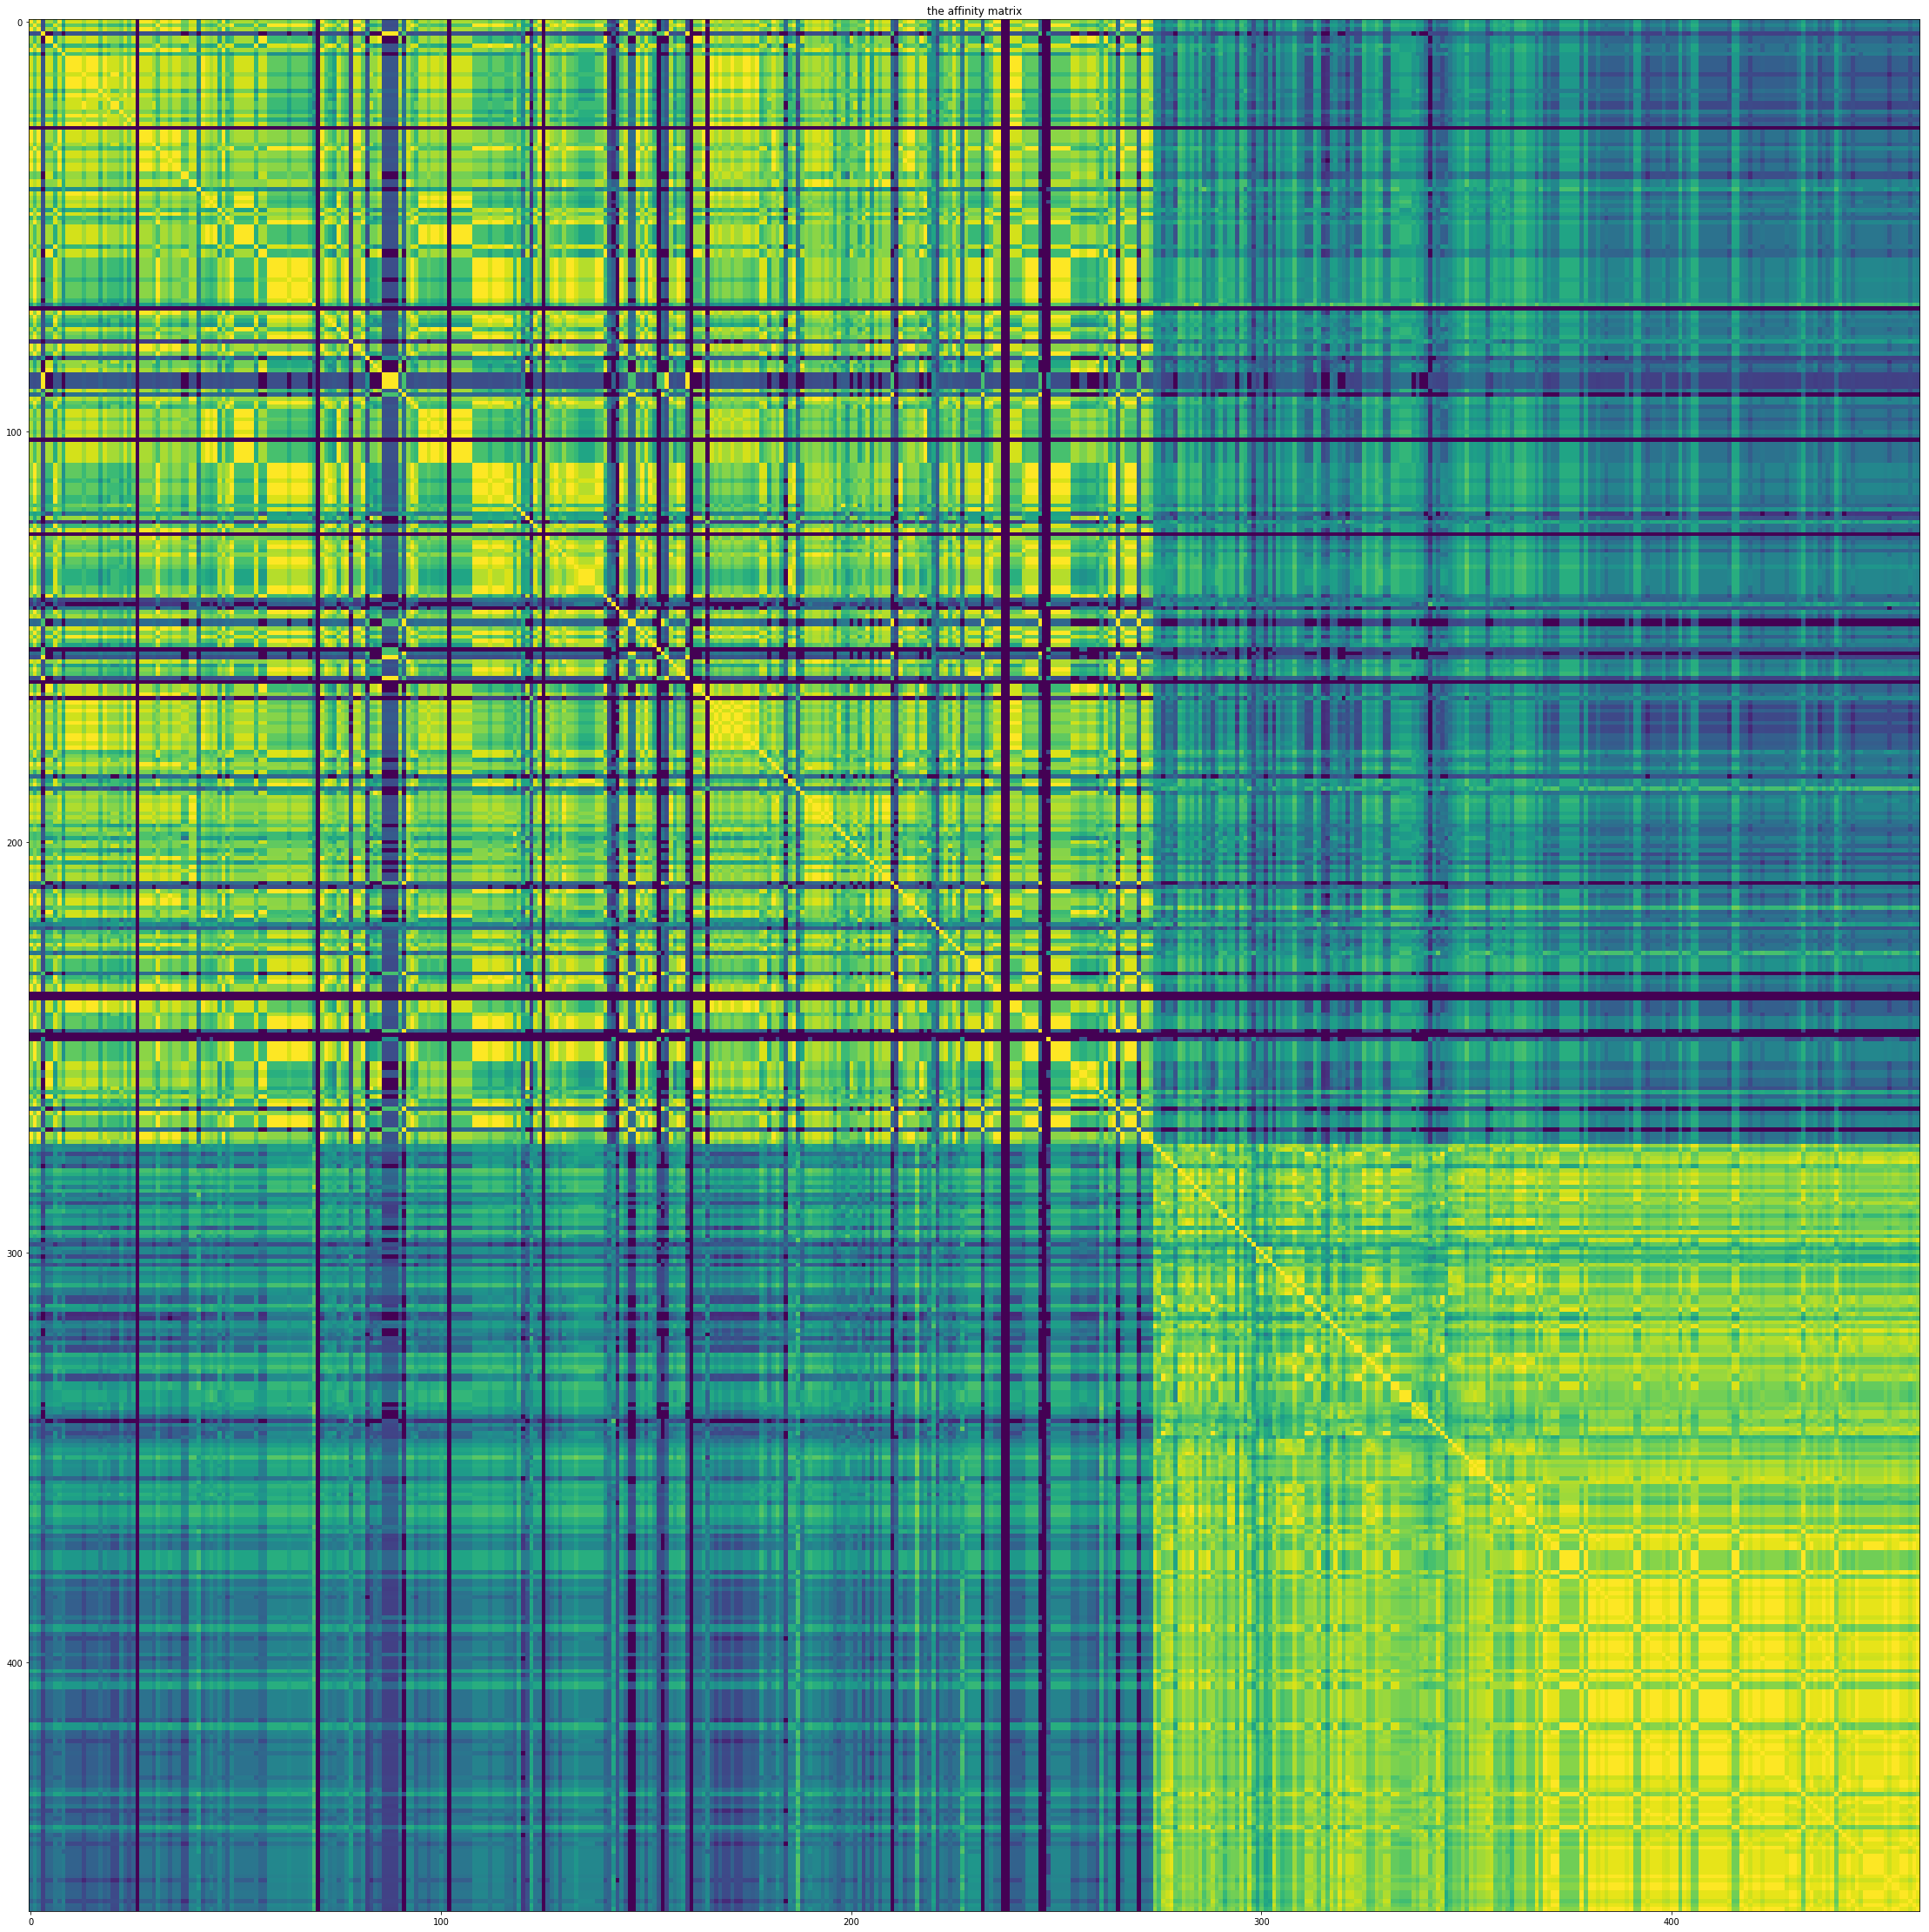

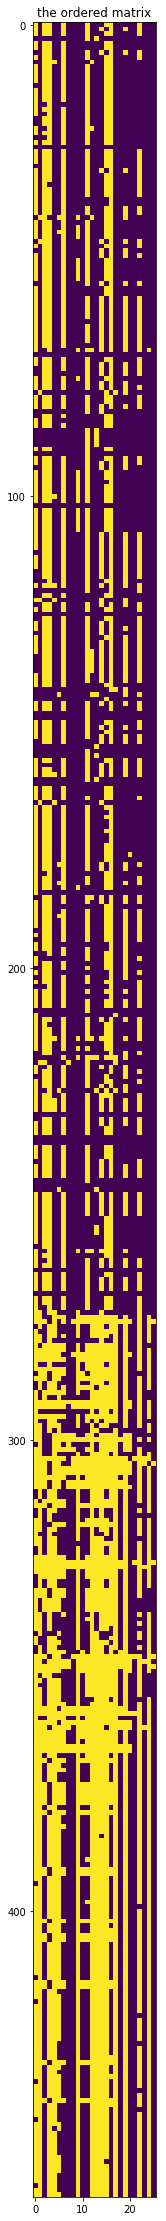

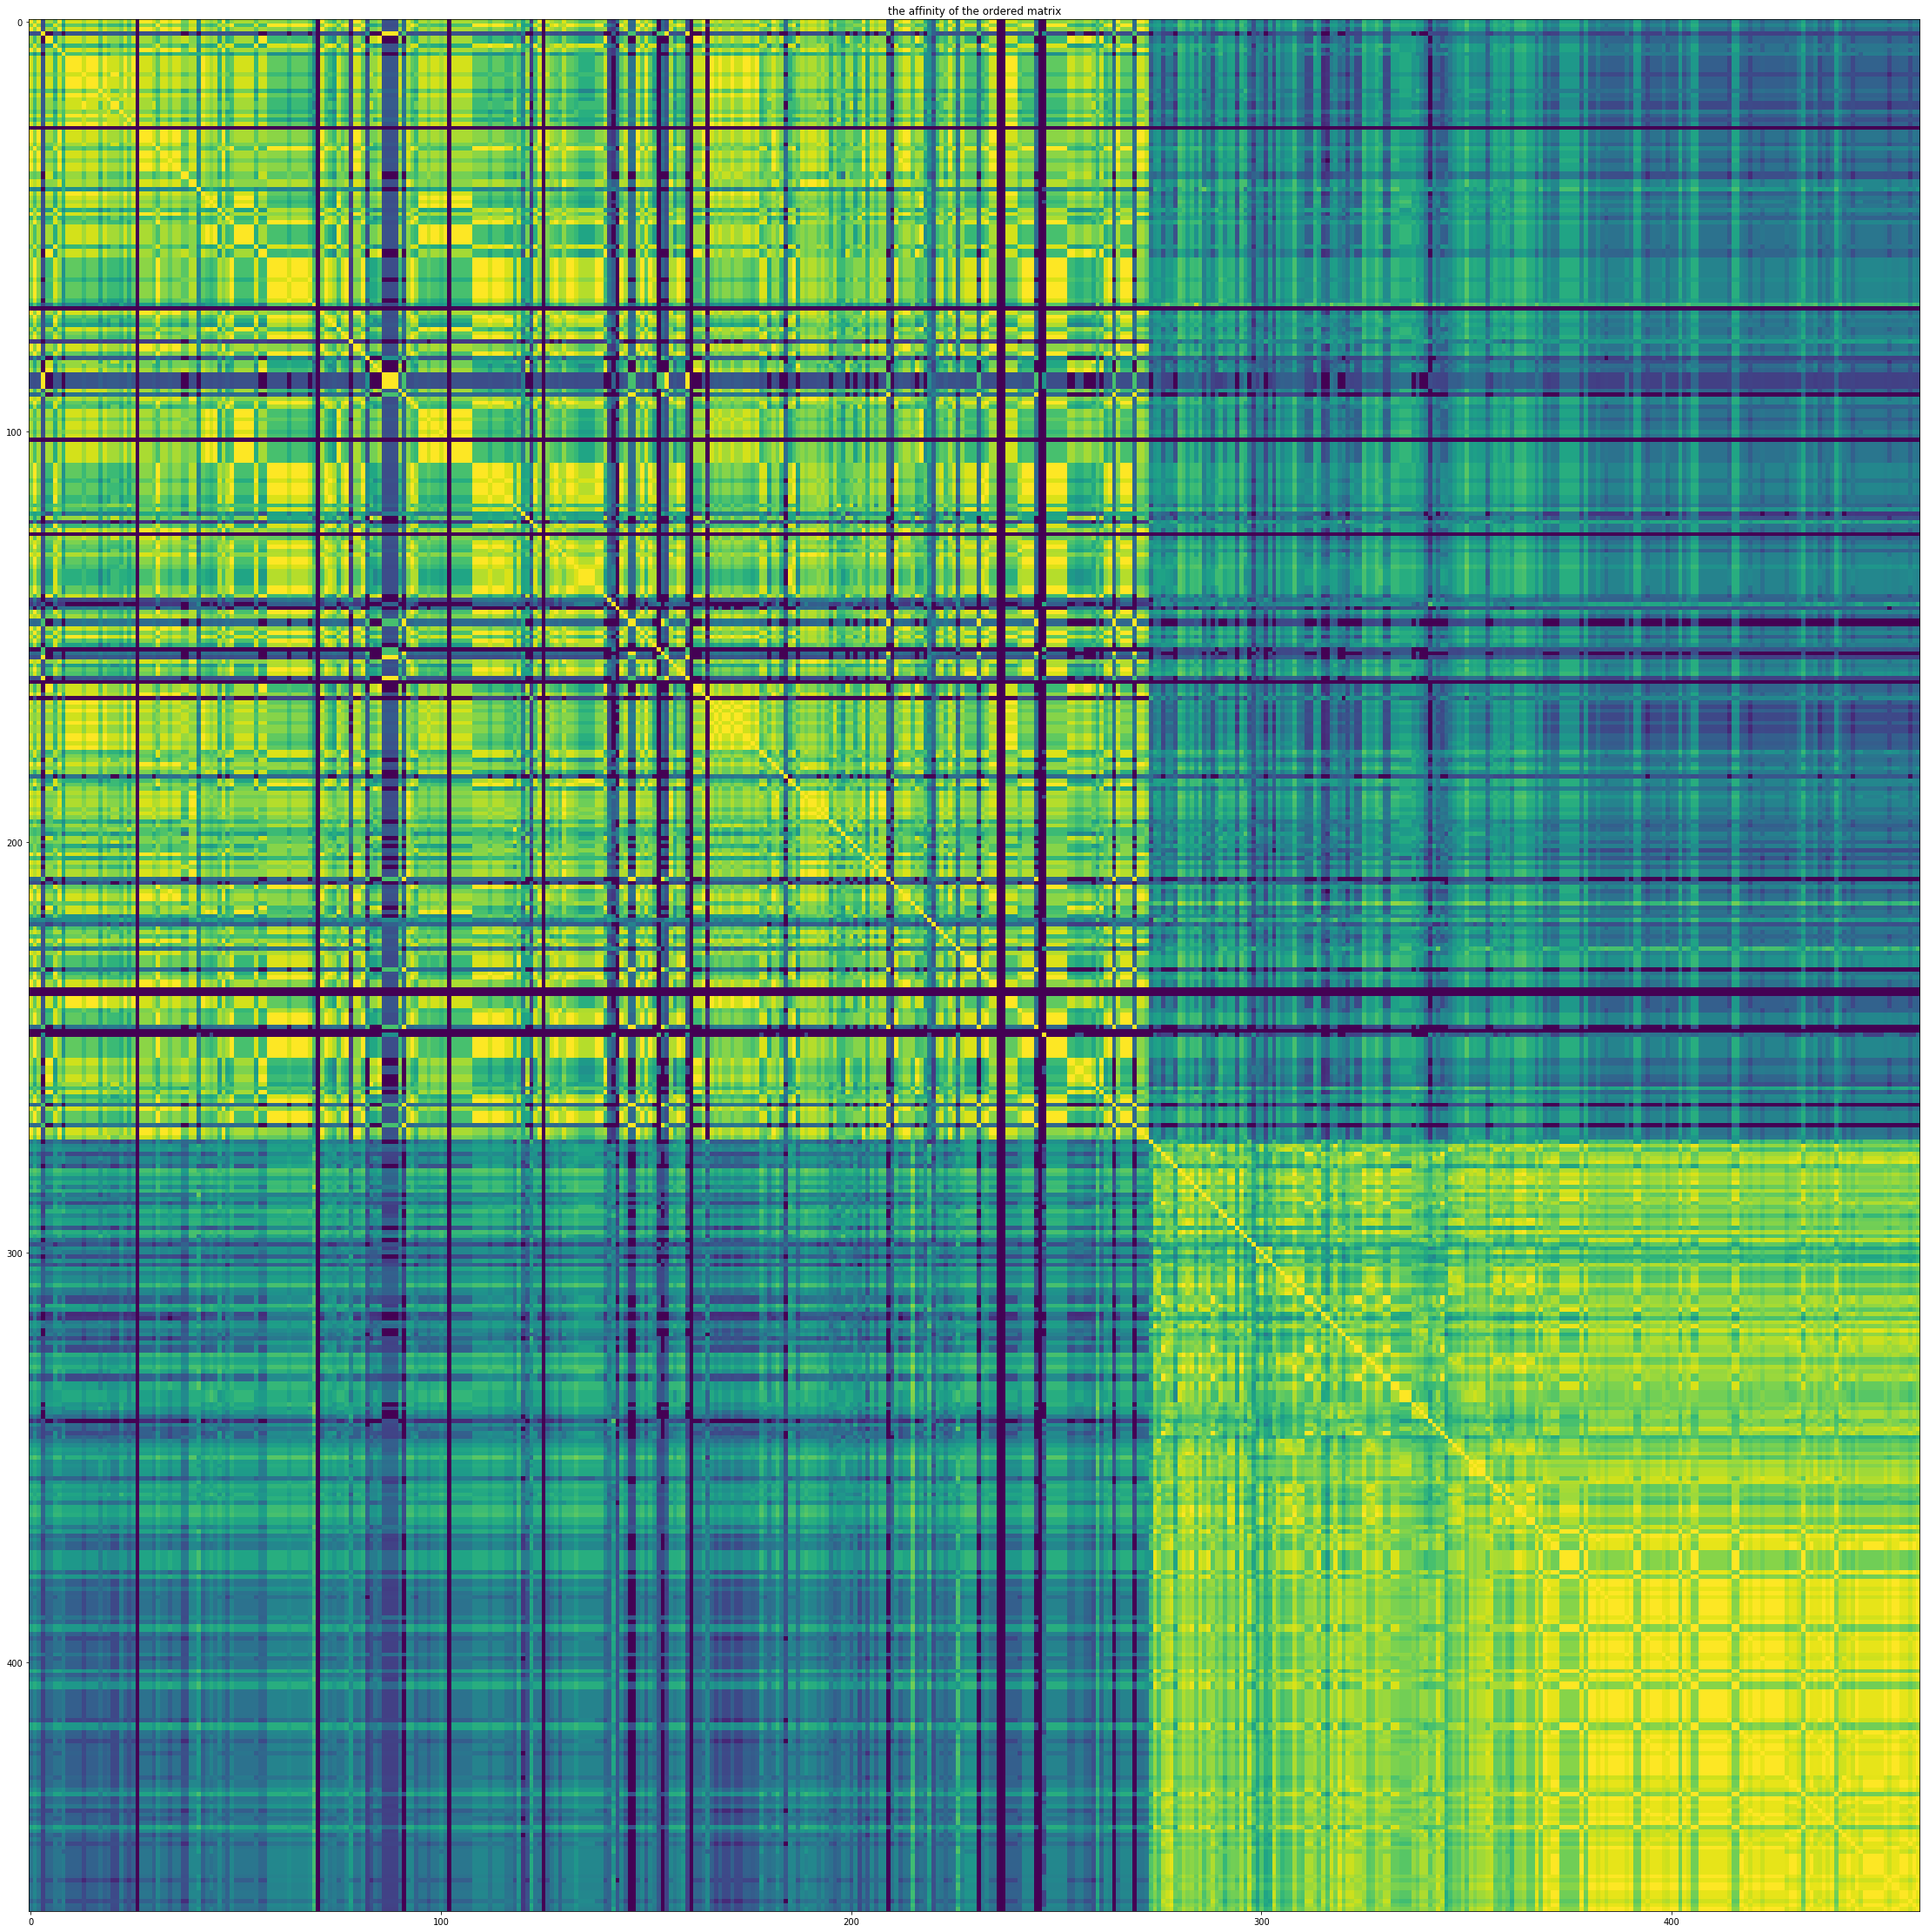

In [89]:
cub.homologize_from_matrix(clustering = 'kmeans')

you can always look at a particular range of species with 'homo_namelist' 


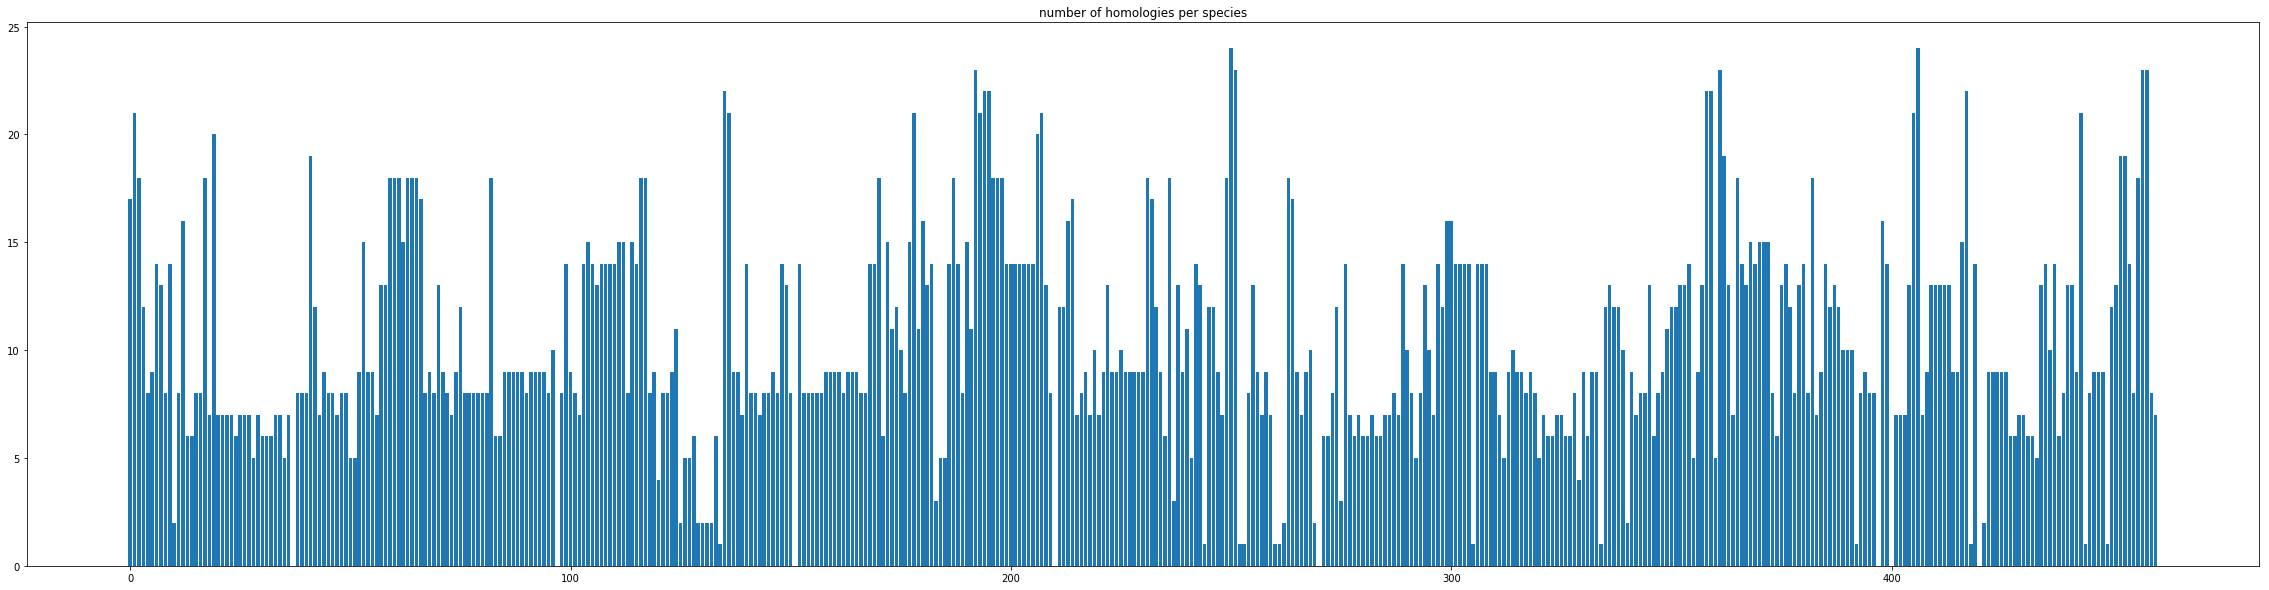

In [55]:
cub.nb_homo_per_species()

In [65]:
mn = KMeans(n_clusters=homogroupnb, n_jobs=-1)
                kmn.fit(mat)
                clust = kmn.labels_

(461,)

In [68]:
a = np.argwhere(clust == 1)
a

array([[  4],
       [  5],
       [  8],
       [ 10],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 18],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 54],
       [ 55],
       [ 56],
       [ 67],
       [ 68],
       [ 69],
       [ 71],
       [ 72],
       [ 73],
       [ 74],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
       [ 81],
       [ 83],
       [ 84],
       [ 85],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
      

In [73]:
mat[a[:,0]]

array([[ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       ..., 
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False]], dtype=bool)

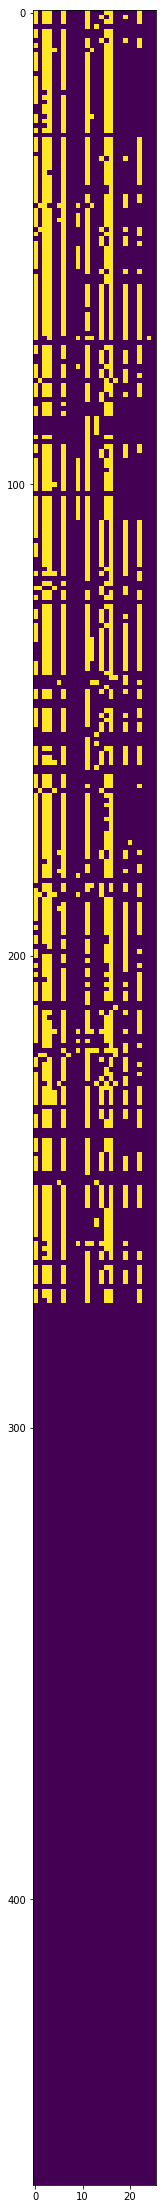

In [80]:
plt.figure(figsize=(40,40))

plt.imshow(orderedmat)
plt.show()

In [ ]:
clust = spect.labels_
a = np.where(clust == 0)
s = a[0].shape[0]
n = np.zeros((s,470))
s

In [ ]:
n = cub.matrix[a[0]]
n.shape

In [ ]:
a = np.where(clust == 1)
n = np.append(n, cub.matrix[a[0]], axis=0)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(n)
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering

spectb = SpectralClustering(n_clusters=4, n_jobs=-1)
spectb.fit(similarities)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(spectb.affinity_matrix_)
plt.show()

In [ ]:
spectb.labels_

## Interactive plot :

In [ ]:
from bokeh.plotting import *
from bokeh.models import HoverTool
from bokeh.io import output_notebook
output_notebook()

In [ ]:
GA = pi.Genes()
GA.plot_gene(tsne,Genes.specieslist[0],centroids=centroids,labels=labels)

In [ ]:
import os
folder='first50'
folder = "data/" + folder
for f in os.listdir(folder):
    nameA = f.split('homology')[0]
nameA